### Importing Libraries

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

#Importing plotly functions
import plotly
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Other Libraries
import math
from functools import reduce
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')


### Loading Datasets

In [2]:
## Cardano
ADA = pd.read_csv('archive crypto/coin_Cardano.csv')
ADA['Date']= pd.to_datetime(ADA['Date']).dt.date
ADA.rename(columns={'Close':'ADA_Close','Volume':'ADA_Volume'}, inplace= True)

#Binance Coin
BNB = pd.read_csv('archive crypto/coin_BinanceCoin.csv')
BNB['Date']= pd.to_datetime(BNB['Date']).dt.date
BNB.rename(columns={'Close':'BNB_Close','Volume':'BNB_Volume'}, inplace= True)


#Tether
USDT = pd.read_csv('archive crypto/coin_Tether.csv')
USDT['Date']= pd.to_datetime(USDT['Date']).dt.date
USDT.rename(columns={'Close':'USDT_Close','Volume':'USDT_Volume'}, inplace= True)

# Ethereum
ETH = pd.read_csv('archive crypto/coin_Ethereum.csv')
ETH['Date']= pd.to_datetime(ETH['Date']).dt.date
ETH.rename(columns={'Close':'ETH_Close','Volume':'ETH_Volume'}, inplace= True)

# Bitcoin
BTC = pd.read_csv('archive crypto/coin_Bitcoin.csv')
BTC['Date']= pd.to_datetime(BTC['Date']).dt.date
BTC.rename(columns={'Close':'BTC_Close','Volume':'BTC_Volume'}, inplace= True)



In [3]:
Df = pd.merge(ADA,BNB,on = 'Date')
Df = pd.merge(Df,USDT,on = 'Date')
Df = pd.merge(Df,BTC,on = 'Date')
Df = pd.merge(Df,ETH,on = 'Date')
Df.head()

,SNo_x,Name_x,Symbol_x,Date,High_x,Low_x,Open_x,ADA_Close,ADA_Volume,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,BNB_Close,BNB_Volume,Marketcap_y,SNo_x,Name_x,Symbol_x,High_x,Low_x,Open_x,USDT_Close,USDT_Volume,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,BTC_Close,BTC_Volume,Marketcap_y,SNo,Name,Symbol,High,Low,Open,ETH_Close,ETH_Volume,Marketcap
0,1,Cardano,ADA,2017-10-02,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08,69,Binance Coin,BNB,1.98287,1.51344,1.52662,1.96467,19367700.0,196467000.0,945,Tether,USDT,1.00476,0.995807,0.998088,1.00170,126009000.0,4.378046e+08,1618,Bitcoin,BTC,4470.229980,4377.459961,4395.810059,4409.319824,1.431730e+09,7.319565e+10,787,Ethereum,ETH,302.920013,294.582001,302.481995,297.475006,339443008.0,2.823776e+10
1,2,Cardano,ADA,2017-10-03,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08,70,Binance Coin,BNB,2.03295,1.67165,1.96783,1.82070,14411500.0,182070000.0,946,Tether,USDT,1.00782,0.998800,1.001880,1.00012,137567008.0,4.371140e+08,1619,Bitcoin,BTC,4432.470215,4258.890137,4408.459961,4317.479980,1.288020e+09,7.168107e+10,788,Ethereum,ETH,300.110992,288.132996,297.483002,292.463013,321680000.0,2.776644e+10
2,3,Cardano,ADA,2017-10-04,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08,71,Binance Coin,BNB,1.85747,1.51766,1.85150,1.60148,7227750.0,160148000.0,947,Tether,USDT,1.00998,0.997725,1.001910,1.00125,114903000.0,4.376079e+08,1620,Bitcoin,BTC,4352.310059,4210.419922,4319.370117,4229.359863,1.116770e+09,7.022503e+10,789,Ethereum,ETH,299.394012,290.894989,292.753998,292.657990,257906000.0,2.778944e+10
3,4,Cardano,ADA,2017-10-05,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08,72,Binance Coin,BNB,1.73519,1.41695,1.63499,1.67849,7503500.0,167849000.0,948,Tether,USDT,1.00675,0.996433,1.000270,1.00030,119952000.0,4.371927e+08,1621,Bitcoin,BTC,4362.640137,4164.049805,4229.879883,4328.410156,1.161770e+09,7.187628e+10,790,Ethereum,ETH,298.040985,288.839996,292.773010,295.863007,253747008.0,2.809834e+10
4,5,Cardano,ADA,2017-10-06,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08,73,Binance Coin,BNB,1.71358,1.53424,1.67731,1.57991,6076260.0,157991000.0,949,Tether,USDT,1.00641,0.998001,1.000420,1.00109,92153696.0,4.375380e+08,1622,Bitcoin,BTC,4413.270020,4320.529785,4324.459961,4370.810059,1.069940e+09,7.258926e+10,791,Ethereum,ETH,308.839996,294.947998,295.154999,308.588013,318664000.0,2.931148e+10


In [4]:
Df.tail()

,SNo_x,Name_x,Symbol_x,Date,High_x,Low_x,Open_x,ADA_Close,ADA_Volume,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,BNB_Close,BNB_Volume,Marketcap_y,SNo_x,Name_x,Symbol_x,High_x,Low_x,Open_x,USDT_Close,USDT_Volume,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,BTC_Close,BTC_Volume,Marketcap_y,SNo,Name,Symbol,High,Low,Open,ETH_Close,ETH_Volume,Marketcap
1369,1370,Cardano,ADA,2021-07-02,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10,1438,Binance Coin,BNB,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10,2314,Tether,USDT,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2156,Ethereum,ETH,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
1370,1371,Cardano,ADA,2021-07-03,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10,1439,Binance Coin,BNB,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10,2315,Tether,USDT,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2157,Ethereum,ETH,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
1371,1372,Cardano,ADA,2021-07-04,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10,1440,Binance Coin,BNB,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10,2316,Tether,USDT,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2158,Ethereum,ETH,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
1372,1373,Cardano,ADA,2021-07-05,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10,1441,Binance Coin,BNB,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10,2317,Tether,USDT,1.001040,0.999426,0.999426,1.000667,4.721585e+10,6.241550e+10,2990,Bitcoin,BTC,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,2159,Ethereum,ETH,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11
1373,1374,Cardano,ADA,2021-07-06,1.456887,1.393282,1.404712,1.418053,1.477700e+09,4.530158e+10,1442,Binance Coin,BNB,321.520965,302.195584,302.195584,320.934802,2.203265e+09,4.924196e+10,2318,Tether,USDT,1.000879,0.999825,1.000728,1.000090,5.105419e+10,6.233384e+10,2991,Bitcoin,BTC,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11,2160,Ethereum,ETH,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710286e+11


In [5]:

Data= Df.copy()
Data.head()

,SNo_x,Name_x,Symbol_x,Date,High_x,Low_x,Open_x,ADA_Close,ADA_Volume,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,BNB_Close,BNB_Volume,Marketcap_y,SNo_x,Name_x,Symbol_x,High_x,Low_x,Open_x,USDT_Close,USDT_Volume,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,BTC_Close,BTC_Volume,Marketcap_y,SNo,Name,Symbol,High,Low,Open,ETH_Close,ETH_Volume,Marketcap
0,1,Cardano,ADA,2017-10-02,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08,69,Binance Coin,BNB,1.98287,1.51344,1.52662,1.96467,19367700.0,196467000.0,945,Tether,USDT,1.00476,0.995807,0.998088,1.00170,126009000.0,4.378046e+08,1618,Bitcoin,BTC,4470.229980,4377.459961,4395.810059,4409.319824,1.431730e+09,7.319565e+10,787,Ethereum,ETH,302.920013,294.582001,302.481995,297.475006,339443008.0,2.823776e+10
1,2,Cardano,ADA,2017-10-03,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08,70,Binance Coin,BNB,2.03295,1.67165,1.96783,1.82070,14411500.0,182070000.0,946,Tether,USDT,1.00782,0.998800,1.001880,1.00012,137567008.0,4.371140e+08,1619,Bitcoin,BTC,4432.470215,4258.890137,4408.459961,4317.479980,1.288020e+09,7.168107e+10,788,Ethereum,ETH,300.110992,288.132996,297.483002,292.463013,321680000.0,2.776644e+10
2,3,Cardano,ADA,2017-10-04,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08,71,Binance Coin,BNB,1.85747,1.51766,1.85150,1.60148,7227750.0,160148000.0,947,Tether,USDT,1.00998,0.997725,1.001910,1.00125,114903000.0,4.376079e+08,1620,Bitcoin,BTC,4352.310059,4210.419922,4319.370117,4229.359863,1.116770e+09,7.022503e+10,789,Ethereum,ETH,299.394012,290.894989,292.753998,292.657990,257906000.0,2.778944e+10
3,4,Cardano,ADA,2017-10-05,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08,72,Binance Coin,BNB,1.73519,1.41695,1.63499,1.67849,7503500.0,167849000.0,948,Tether,USDT,1.00675,0.996433,1.000270,1.00030,119952000.0,4.371927e+08,1621,Bitcoin,BTC,4362.640137,4164.049805,4229.879883,4328.410156,1.161770e+09,7.187628e+10,790,Ethereum,ETH,298.040985,288.839996,292.773010,295.863007,253747008.0,2.809834e+10
4,5,Cardano,ADA,2017-10-06,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08,73,Binance Coin,BNB,1.71358,1.53424,1.67731,1.57991,6076260.0,157991000.0,949,Tether,USDT,1.00641,0.998001,1.000420,1.00109,92153696.0,4.375380e+08,1622,Bitcoin,BTC,4413.270020,4320.529785,4324.459961,4370.810059,1.069940e+09,7.258926e+10,791,Ethereum,ETH,308.839996,294.947998,295.154999,308.588013,318664000.0,2.931148e+10


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1373
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SNo_x        1374 non-null   int64  
 1   Name_x       1374 non-null   object 
 2   Symbol_x     1374 non-null   object 
 3   Date         1374 non-null   object 
 4   High_x       1374 non-null   float64
 5   Low_x        1374 non-null   float64
 6   Open_x       1374 non-null   float64
 7   ADA_Close    1374 non-null   float64
 8   ADA_Volume   1374 non-null   float64
 9   Marketcap_x  1374 non-null   float64
 10  SNo_y        1374 non-null   int64  
 11  Name_y       1374 non-null   object 
 12  Symbol_y     1374 non-null   object 
 13  High_y       1374 non-null   float64
 14  Low_y        1374 non-null   float64
 15  Open_y       1374 non-null   float64
 16  BNB_Close    1374 non-null   float64
 17  BNB_Volume   1374 non-null   float64
 18  Marketcap_y  1374 non-null   float64
 19  SNo_x 

In [7]:

Data.isnull().sum()

SNo_x          0
Name_x         0
Symbol_x       0
Date           0
High_x         0
Low_x          0
Open_x         0
ADA_Close      0
ADA_Volume     0
Marketcap_x    0
SNo_y          0
Name_y         0
Symbol_y       0
High_y         0
Low_y          0
Open_y         0
BNB_Close      0
BNB_Volume     0
Marketcap_y    0
SNo_x          0
Name_x         0
Symbol_x       0
High_x         0
Low_x          0
Open_x         0
USDT_Close     0
USDT_Volume    0
Marketcap_x    0
SNo_y          0
Name_y         0
Symbol_y       0
High_y         0
Low_y          0
Open_y         0
BTC_Close      0
BTC_Volume     0
Marketcap_y    0
SNo            0
Name           0
Symbol         0
High           0
Low            0
Open           0
ETH_Close      0
ETH_Volume     0
Marketcap      0
dtype: int64

In [8]:

Crypto = Data[['Date','ADA_Close','ADA_Volume','BNB_Close','BNB_Volume','USDT_Close','USDT_Volume','BTC_Close','BTC_Volume','ETH_Close','ETH_Volume']]
Crypto

,Date,ADA_Close,ADA_Volume,BNB_Close,BNB_Volume,USDT_Close,USDT_Volume,BTC_Close,BTC_Volume,ETH_Close,ETH_Volume
0,2017-10-02,0.025932,5.764130e+07,1.964670,1.936770e+07,1.001700,1.260090e+08,4409.319824,1.431730e+09,297.475006,3.394430e+08
1,2017-10-03,0.020816,1.699780e+07,1.820700,1.441150e+07,1.000120,1.375670e+08,4317.479980,1.288020e+09,292.463013,3.216800e+08
2,2017-10-04,0.021931,9.000050e+06,1.601480,7.227750e+06,1.001250,1.149030e+08,4229.359863,1.116770e+09,292.657990,2.579060e+08
3,2017-10-05,0.021489,5.562510e+06,1.678490,7.503500e+06,1.000300,1.199520e+08,4328.410156,1.161770e+09,295.863007,2.537470e+08
4,2017-10-06,0.018539,7.780710e+06,1.579910,6.076260e+06,1.001090,9.215370e+07,4370.810059,1.069940e+09,308.588013,3.186640e+08
...,...,...,...,...,...,...,...,...,...,...,...
1369,2021-07-02,1.394397,2.159410e+09,287.423094,1.133633e+09,1.000033,4.562659e+10,33897.048590,3.872897e+10,2150.040364,3.179621e+10
1370,2021-07-03,1.406836,2.028094e+09,298.237117,1.113777e+09,0.999956,4.119499e+10,34668.548402,2.438396e+10,2226.114282,1.743336e+10
1371,2021-07-04,1.458184,1.806362e+09,307.732096,1.387396e+09,0.999501,4.306666e+10,35287.779766,2.492431e+10,2321.724112,1.878711e+10
1372,2021-07-05,1.404898,1.759461e+09,302.377980,1.504870e+09,1.000667,4.721585e+10,33746.002456,2.672155e+10,2198.582464,2.010379e+10


In [9]:

Crypto = Crypto.set_index('Date')
Crypto

,ADA_Close,ADA_Volume,BNB_Close,BNB_Volume,USDT_Close,USDT_Volume,BTC_Close,BTC_Volume,ETH_Close,ETH_Volume
Date,,,,,,,,,,
2017-10-02,0.025932,5.764130e+07,1.964670,1.936770e+07,1.001700,1.260090e+08,4409.319824,1.431730e+09,297.475006,3.394430e+08
2017-10-03,0.020816,1.699780e+07,1.820700,1.441150e+07,1.000120,1.375670e+08,4317.479980,1.288020e+09,292.463013,3.216800e+08
2017-10-04,0.021931,9.000050e+06,1.601480,7.227750e+06,1.001250,1.149030e+08,4229.359863,1.116770e+09,292.657990,2.579060e+08
2017-10-05,0.021489,5.562510e+06,1.678490,7.503500e+06,1.000300,1.199520e+08,4328.410156,1.161770e+09,295.863007,2.537470e+08
2017-10-06,0.018539,7.780710e+06,1.579910,6.076260e+06,1.001090,9.215370e+07,4370.810059,1.069940e+09,308.588013,3.186640e+08
...,...,...,...,...,...,...,...,...,...,...
2021-07-02,1.394397,2.159410e+09,287.423094,1.133633e+09,1.000033,4.562659e+10,33897.048590,3.872897e+10,2150.040364,3.179621e+10
2021-07-03,1.406836,2.028094e+09,298.237117,1.113777e+09,0.999956,4.119499e+10,34668.548402,2.438396e+10,2226.114282,1.743336e+10
2021-07-04,1.458184,1.806362e+09,307.732096,1.387396e+09,0.999501,4.306666e+10,35287.779766,2.492431e+10,2321.724112,1.878711e+10


In [10]:

Crypto.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ADA_Close,1374.0,2.563126e-01,4.096914e-01,1.853910e-02,4.594670e-02,8.700222e-02,1.833791e-01,2.309113e+00
ADA_Volume,1374.0,8.934183e+08,2.107653e+09,1.739460e+06,5.014830e+07,1.186742e+08,4.875977e+08,1.914198e+10
BNB_Close,1374.0,5.478110e+01,1.176374e+02,1.152570e+00,1.102432e+01,1.668437e+01,2.805894e+01,6.756841e+02
BNB_Volume,1374.0,6.572685e+08,1.509535e+09,9.284190e+03,6.676568e+07,2.059036e+08,4.041180e+08,1.798295e+10
USDT_Close,1374.0,1.002156e+00,6.589754e-03,9.666440e-01,9.999411e-01,1.001109e+00,1.003931e+00,1.077880e+00
USDT_Volume,1374.0,3.268750e+10,4.018434e+10,8.538460e+07,3.192428e+09,1.944637e+10,4.505374e+10,2.790675e+11
BTC_Close,1374.0,1.376846e+04,1.360022e+04,3.236762e+03,6.687612e+03,8.911304e+03,1.158203e+04,6.350346e+04
BTC_Volume,1374.0,2.351226e+10,2.196745e+10,9.069280e+08,6.278357e+09,1.757534e+10,3.416910e+10,3.509679e+11
ETH_Close,1374.0,5.702908e+02,6.830572e+02,8.430830e+01,1.833353e+02,2.877723e+02,5.956929e+02,4.168701e+03
ETH_Volume,1374.0,1.098263e+10,1.164947e+10,2.537470e+08,2.387410e+09,7.354381e+09,1.433900e+10,8.448291e+10



### Data Exploration

- Calculating the matrics like (Mean, Median, Minimum and Maximum values and Standered Deviation for only closing balance of different Cryptocurrencies

In [11]:
# Creating a varibale Descriptive Statisitcs to analyse the Data
Descriptive_Statistics = pd.DataFrame()
# Giving company names
Descriptive_Statistics['Currencies'] = ['Cardano','Binance Coin','Tether','Bitcoin','Ethereum']
# Calculating Mean
Descriptive_Statistics['Mean']    = [Crypto['ADA_Close'].mean(),Crypto['BNB_Close'].mean(),Crypto['USDT_Close'].mean(),
                                    Crypto['BTC_Close'].mean(),Crypto['ETH_Close'].mean()]
# Calculating Median
Descriptive_Statistics['Median'] =  [Crypto['ADA_Close'].median(),Crypto['BNB_Close'].median(),Crypto['USDT_Close'].median(),
                                    Crypto['BTC_Close'].median(),Crypto['ETH_Close'].median()]
# Calculating Minimum Value
Descriptive_Statistics['Min']  =  [Crypto['ADA_Close'].min(),Crypto['BNB_Close'].min(),Crypto['USDT_Close'].min(),
                                    Crypto['BTC_Close'].min(),Crypto['ETH_Close'].min()]
# Calculating Maximum Value
Descriptive_Statistics['Max']  =  [Crypto['ADA_Close'].max(),Crypto['BNB_Close'].max(),Crypto['USDT_Close'].max(),
                                    Crypto['BTC_Close'].max(),Crypto['ETH_Close'].max()]
# Calculating Standard Deviation/ Risk
Descriptive_Statistics['Std/Risk']=  [Crypto['ADA_Close'].std(),Crypto['BNB_Close'].std(),Crypto['USDT_Close'].std(),
                                    Crypto['BTC_Close'].std(),Crypto['ETH_Close'].std()]

# Cleaning the Values
Descriptive_Statistics['Mean']  = Descriptive_Statistics['Mean'].round(2)
Descriptive_Statistics['Median']  = Descriptive_Statistics['Median'].round(2)
Descriptive_Statistics['Min']  = Descriptive_Statistics['Min'].round(2)
Descriptive_Statistics['Max']  = Descriptive_Statistics['Max'].round(2)
Descriptive_Statistics['Std/Risk']  = Descriptive_Statistics['Std/Risk'].round(2)
Descriptive_Statistics.set_index(['Currencies'],inplace = True)

In [12]:
Descriptive_Statistics

,Mean,Median,Min,Max,Std/Risk
Currencies,,,,,
Cardano,0.26,0.09,0.02,2.31,0.41
Binance Coin,54.78,16.68,1.15,675.68,117.64
Tether,1.00,1.00,0.97,1.08,0.01
Bitcoin,13768.46,8911.30,3236.76,63503.46,13600.22
Ethereum,570.29,287.77,84.31,4168.70,683.06


### Calculating Daily Returns

In [13]:
Crypto_daily_returns = Crypto.pct_change(1)
Crypto_daily_returns

,ADA_Close,ADA_Volume,BNB_Close,BNB_Volume,USDT_Close,USDT_Volume,BTC_Close,BTC_Volume,ETH_Close,ETH_Volume
Date,,,,,,,,,,
2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-03,-0.197287,-0.705111,-0.073279,-0.255900,-0.001577,0.091724,-0.020829,-0.100375,-0.016848,-0.052330
2017-10-04,0.053599,-0.470517,-0.120404,-0.498473,0.001130,-0.164749,-0.020410,-0.132956,0.000667,-0.198253
2017-10-05,-0.020190,-0.381947,0.048087,0.038152,-0.000949,0.043941,0.023420,0.040295,0.010951,-0.016126
2017-10-06,-0.137263,0.398777,-0.058731,-0.190210,0.000790,-0.231745,0.009796,-0.079043,0.043010,0.255834
...,...,...,...,...,...,...,...,...,...,...
2021-07-02,0.044014,0.078536,-0.002759,-0.165093,-0.000194,-0.164003,0.009679,0.023521,0.017238,0.094093
2021-07-03,0.008921,-0.060811,0.037624,-0.017515,-0.000076,-0.097128,0.022760,-0.370395,0.035383,-0.451716
2021-07-04,0.036499,-0.109330,0.031837,0.245667,-0.000455,0.045434,0.017861,0.022160,0.042949,0.077653


In [14]:
Crypto_daily_returns  = Crypto_daily_returns.dropna(axis=0)
Crypto_daily_returns.head()

,ADA_Close,ADA_Volume,BNB_Close,BNB_Volume,USDT_Close,USDT_Volume,BTC_Close,BTC_Volume,ETH_Close,ETH_Volume
Date,,,,,,,,,,
2017-10-03,-0.197287,-0.705111,-0.073279,-0.255900,-0.001577,0.091724,-0.020829,-0.100375,-0.016848,-0.052330
2017-10-04,0.053599,-0.470517,-0.120404,-0.498473,0.001130,-0.164749,-0.020410,-0.132956,0.000667,-0.198253
2017-10-05,-0.020190,-0.381947,0.048087,0.038152,-0.000949,0.043941,0.023420,0.040295,0.010951,-0.016126
2017-10-06,-0.137263,0.398777,-0.058731,-0.190210,0.000790,-0.231745,0.009796,-0.079043,0.043010,0.255834
2017-10-07,0.129553,-0.047485,0.002747,-0.081873,-0.001768,-0.028318,0.012831,-0.152356,0.008218,0.073874


In [15]:

Crypto_daily_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ADA_Close,1373.0,0.005876,0.083598,-0.395681,-0.029813,0.001026,0.032955,1.366810
ADA_Volume,1373.0,0.087560,0.511324,-0.744913,-0.210773,-0.026200,0.242740,5.054265
BNB_Close,1373.0,0.005886,0.067605,-0.419046,-0.024008,0.001037,0.032053,0.697604
BNB_Volume,1373.0,6.329207,232.877154,-0.999887,-0.142604,-0.019099,0.138085,8629.068567
USDT_Close,1373.0,0.000013,0.005263,-0.051211,-0.001687,-0.000073,0.001597,0.058239
USDT_Volume,1373.0,0.030893,0.263738,-0.725963,-0.121968,-0.006665,0.130661,4.134428
BTC_Close,1373.0,0.002389,0.042076,-0.371695,-0.015572,0.001818,0.019350,0.252472
BTC_Volume,1373.0,0.026645,0.264119,-0.869188,-0.110757,-0.008253,0.123025,5.439003
ETH_Close,1373.0,0.002905,0.052526,-0.423472,-0.020707,0.001221,0.028606,0.264581
ETH_Volume,1373.0,0.027686,0.242536,-0.661533,-0.114280,-0.006009,0.114868,1.924079


### Descriptive Analysis of Daily Returns

In [16]:
# Creating dataframe
Daily_Descriptive_Statistics = pd.DataFrame()
Daily_Descriptive_Statistics['Currencies'] = ['Cardano','Binance Coin','Tether','Bitcoin','Ethereum']

# Calculating Mean
Daily_Descriptive_Statistics['Mean']    = [Crypto_daily_returns['ADA_Close'].mean(),Crypto_daily_returns['BNB_Close'].mean(),Crypto_daily_returns['USDT_Close'].mean(),
                                    Crypto_daily_returns['BTC_Close'].mean(),Crypto_daily_returns['ETH_Close'].mean()]
# # Calculating Median
Daily_Descriptive_Statistics['Median'] =  [Crypto_daily_returns['ADA_Close'].median(),Crypto_daily_returns['BNB_Close'].median(),Crypto_daily_returns['USDT_Close'].median(),
                                    Crypto_daily_returns['BTC_Close'].median(),Crypto_daily_returns['ETH_Close'].median()]
# Calculating Minimum Value
Daily_Descriptive_Statistics['Min']  =  [Crypto_daily_returns['ADA_Close'].min(),Crypto_daily_returns['BNB_Close'].min(),Crypto_daily_returns['USDT_Close'].min(),
                                    Crypto_daily_returns['BTC_Close'].min(),Crypto_daily_returns['ETH_Close'].min()]
# Calculating Maximum Value
Daily_Descriptive_Statistics['Max']  =  [Crypto_daily_returns['ADA_Close'].max(),Crypto_daily_returns['BNB_Close'].max(),Crypto_daily_returns['USDT_Close'].max(),
                                    Crypto_daily_returns['BTC_Close'].max(),Crypto_daily_returns['ETH_Close'].max()]

# Calculating Standard Deviation/ Risk
Daily_Descriptive_Statistics['Std/Risk']=  [Crypto_daily_returns['ADA_Close'].std(),Crypto_daily_returns['BNB_Close'].std(),Crypto_daily_returns['USDT_Close'].std(),
                                    Crypto_daily_returns['BTC_Close'].std(),Crypto_daily_returns['ETH_Close'].std()]

# Calculating Annualized Mean
Daily_Descriptive_Statistics['Annualized Return'] = [252*Crypto_daily_returns['ADA_Close'].mean(),252*Crypto_daily_returns['BNB_Close'].mean(),252*Crypto_daily_returns['USDT_Close'].mean(),
                                     252*Crypto_daily_returns['BTC_Close'].mean(),252*Crypto_daily_returns['ETH_Close'].mean()]

# Calculating Annualized Standard Deviation
Daily_Descriptive_Statistics['Annualized Std/Risk'] = [math.sqrt(252)*Crypto_daily_returns['ADA_Close'].std(),math.sqrt(252)*Crypto_daily_returns['BNB_Close'].std(),math.sqrt(252)*Crypto_daily_returns['USDT_Close'].std(),
                                     math.sqrt(252)*Crypto_daily_returns['BTC_Close'].std(),math.sqrt(252)*Crypto_daily_returns['ETH_Close'].std()]



# Calculating Cummulative Returns
Daily_Descriptive_Statistics['Cummulative Returns'] = [(Crypto_daily_returns['ADA_Close'].iloc[-1]/Crypto_daily_returns['ADA_Close'].iloc[1])-1,
                                                       (Crypto_daily_returns['BNB_Close'].iloc[-1]/Crypto_daily_returns['BNB_Close'].iloc[1])-1,
                                                       (Crypto_daily_returns['USDT_Close'].iloc[-1]/Crypto_daily_returns['USDT_Close'].iloc[1])-1,
                                                       (Crypto_daily_returns['BTC_Close'].iloc[-1]/Crypto_daily_returns['BTC_Close'].iloc[1])-1,
                                                       (Crypto_daily_returns['ETH_Close'].iloc[-1]/Crypto_daily_returns['ETH_Close'].iloc[1])-1]

# Cleaning the Values
Daily_Descriptive_Statistics['Mean']  =   (Daily_Descriptive_Statistics['Mean']*100).round(3)
Daily_Descriptive_Statistics['Median']  =     (Daily_Descriptive_Statistics['Median']*100).round(3)
Daily_Descriptive_Statistics['Min']  =   (Daily_Descriptive_Statistics['Min']*100).round(3)
Daily_Descriptive_Statistics['Max']  =    (Daily_Descriptive_Statistics['Max']*100).round(3)
Daily_Descriptive_Statistics['Std/Risk']  =  (Daily_Descriptive_Statistics['Std/Risk']*100).round(3)
Daily_Descriptive_Statistics['Annualized Return'] = (Daily_Descriptive_Statistics['Annualized Return']*100).round(3)
Daily_Descriptive_Statistics['Annualized Std/Risk'] = (Daily_Descriptive_Statistics['Annualized Std/Risk']*100).round(3)
Daily_Descriptive_Statistics['Cummulative Returns'] = (Daily_Descriptive_Statistics['Cummulative Returns']*100).round(3)                                                   
Daily_Descriptive_Statistics.set_index(['Currencies'],inplace = True)

In [17]:
Daily_Descriptive_Statistics

,Mean,Median,Min,Max,Std/Risk,Annualized Return,Annualized Std/Risk,Cummulative Returns
Currencies,,,,,,,,
Cardano,0.588,0.103,-39.568,136.681,8.360,148.084,132.708,-82.531
Binance Coin,0.589,0.104,-41.905,69.760,6.760,148.322,107.320,-150.970
Tether,0.001,-0.007,-5.121,5.824,0.526,0.318,8.355,-151.064
Bitcoin,0.239,0.182,-37.170,25.247,4.208,60.201,66.793,-171.025
Ethereum,0.290,0.122,-42.347,26.458,5.253,73.201,83.382,8503.000


#### Analysis of Daily Returns
- Bitcoin and Etherim have less risk with fair Annual Returns
- Cardano  and Binance Coin have more Annualuzed Return with higher risk
- With greater risk we can get greater increase
- Tether have least returns with less risk.

### Visualisations

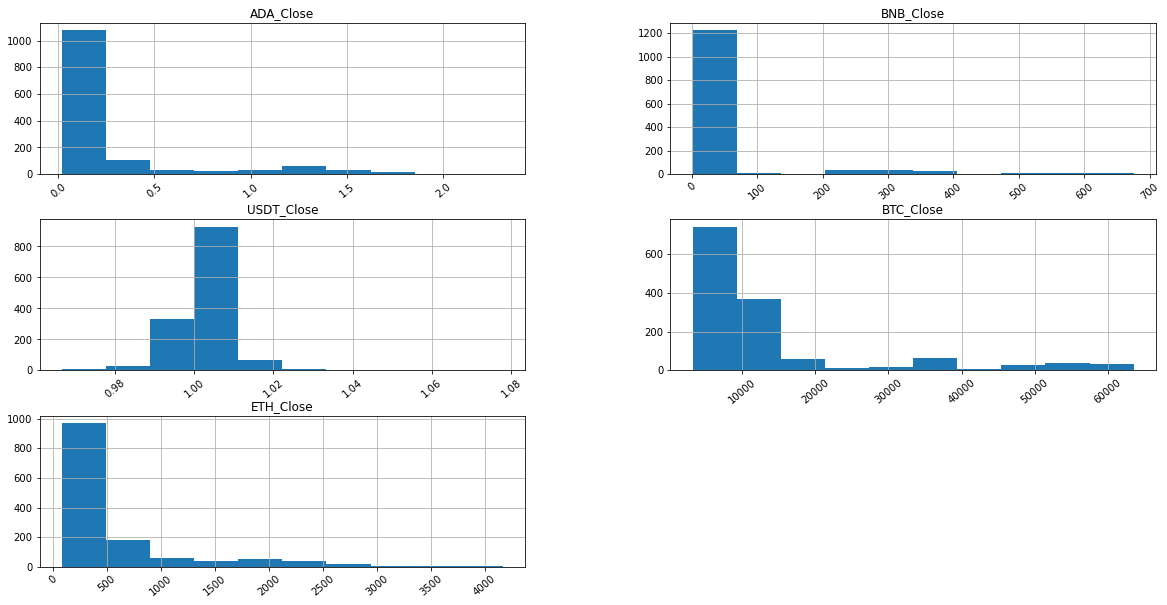

In [18]:
Crypto[['ADA_Close','BNB_Close','USDT_Close','BTC_Close','ETH_Close']].hist(figsize=(20,10), xrot= 40)
plt.title('Currencies comparision with regular prices')
plt.show()

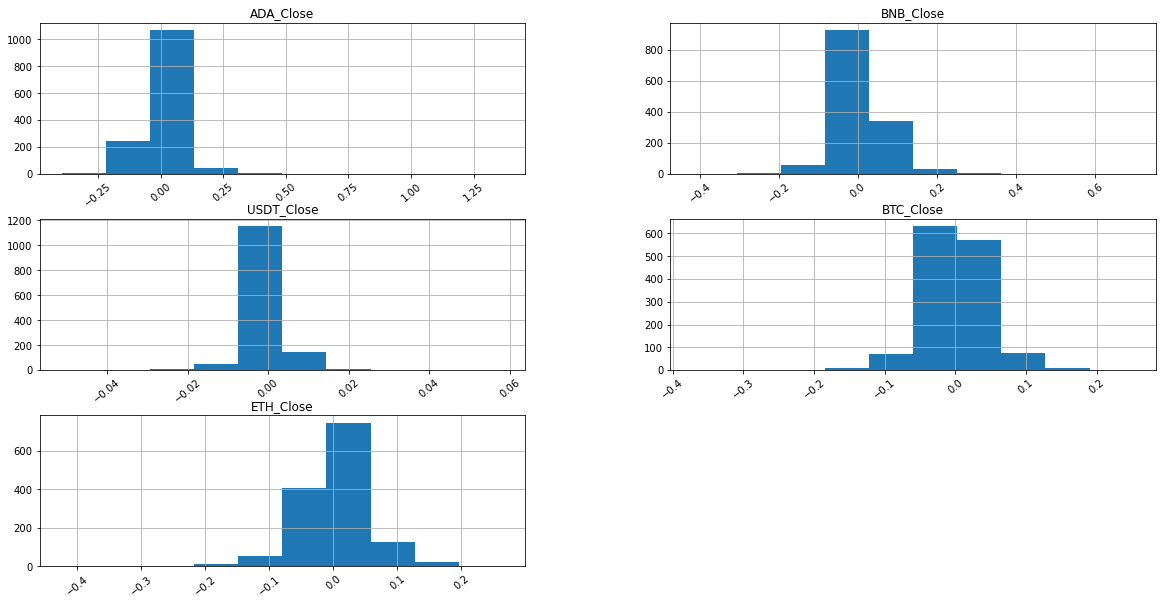

In [19]:

Crypto_daily_returns[['ADA_Close','BNB_Close','USDT_Close','BTC_Close','ETH_Close']].hist(figsize=(20,10), xrot= 40)
plt.title('Currencies comparision with daily returns')
plt.show()

#### Normalization of Crypto Values

In [20]:
Crypto['Normalized_ADA'] = Crypto['ADA_Close']/Crypto['ADA_Close'].iloc[0]
Crypto['Normalized_BNB'] = Crypto['BNB_Close']/Crypto['BNB_Close'].iloc[0]
Crypto['Normalized_USDT'] = Crypto['USDT_Close']/Crypto['USDT_Close'].iloc[0]
Crypto['Normalized_BTC'] = Crypto['BTC_Close']/Crypto['BTC_Close'].iloc[0]
Crypto['Normalized_ETH'] = Crypto['ETH_Close']/Crypto['ETH_Close'].iloc[0]
Crypto.head()

,ADA_Close,ADA_Volume,BNB_Close,BNB_Volume,USDT_Close,USDT_Volume,BTC_Close,BTC_Volume,ETH_Close,ETH_Volume,Normalized_ADA,Normalized_BNB,Normalized_USDT,Normalized_BTC,Normalized_ETH
Date,,,,,,,,,,,,,,,
2017-10-02,0.025932,57641300.0,1.96467,19367700.0,1.00170,126009000.0,4409.319824,1.431730e+09,297.475006,339443008.0,1.000000,1.000000,1.000000,1.000000,1.000000
2017-10-03,0.020816,16997800.0,1.82070,14411500.0,1.00012,137567008.0,4317.479980,1.288020e+09,292.463013,321680000.0,0.802713,0.926721,0.998423,0.979171,0.983152
2017-10-04,0.021931,9000050.0,1.60148,7227750.0,1.00125,114903000.0,4229.359863,1.116770e+09,292.657990,257906000.0,0.845738,0.815139,0.999551,0.959186,0.983807
2017-10-05,0.021489,5562510.0,1.67849,7503500.0,1.00030,119952000.0,4328.410156,1.161770e+09,295.863007,253747008.0,0.828662,0.854337,0.998602,0.981650,0.994581
2017-10-06,0.018539,7780710.0,1.57991,6076260.0,1.00109,92153696.0,4370.810059,1.069940e+09,308.588013,318664000.0,0.714918,0.804161,0.999391,0.991266,1.037358


 ### Visualizations with or without Normalization

#### Without Normalization

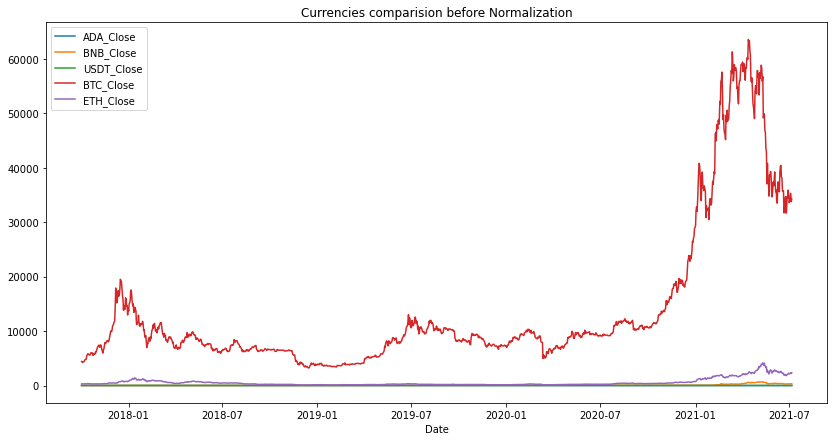

In [21]:
Crypto[['ADA_Close','BNB_Close','USDT_Close','BTC_Close','ETH_Close']].plot(figsize = (14,7))
plt.legend(loc = 'best')
plt.title('Currencies comparision before Normalization')
plt.show(block=False)

### With Normalization

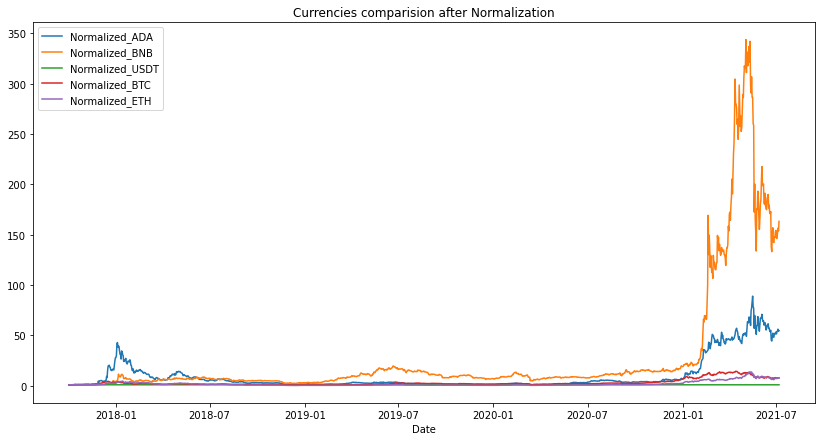

In [22]:
Crypto[['Normalized_ADA','Normalized_BNB','Normalized_USDT','Normalized_BTC','Normalized_ETH']].plot(figsize = (14,7))
plt.legend(loc = 'best')
plt.title('Currencies comparision after Normalization')
plt.show(block=False)


#### Correlation

In [23]:
Corr = Crypto[['ADA_Close','BNB_Close','USDT_Close','BTC_Close','ETH_Close']].corr()
Corr

,ADA_Close,BNB_Close,USDT_Close,BTC_Close,ETH_Close
ADA_Close,1.000000,0.893322,-0.069347,0.855017,0.960793
BNB_Close,0.893322,1.000000,-0.084194,0.855649,0.903535
USDT_Close,-0.069347,-0.084194,1.000000,-0.091675,-0.090590
BTC_Close,0.855017,0.855649,-0.091675,1.000000,0.885368
ETH_Close,0.960793,0.903535,-0.090590,0.885368,1.000000


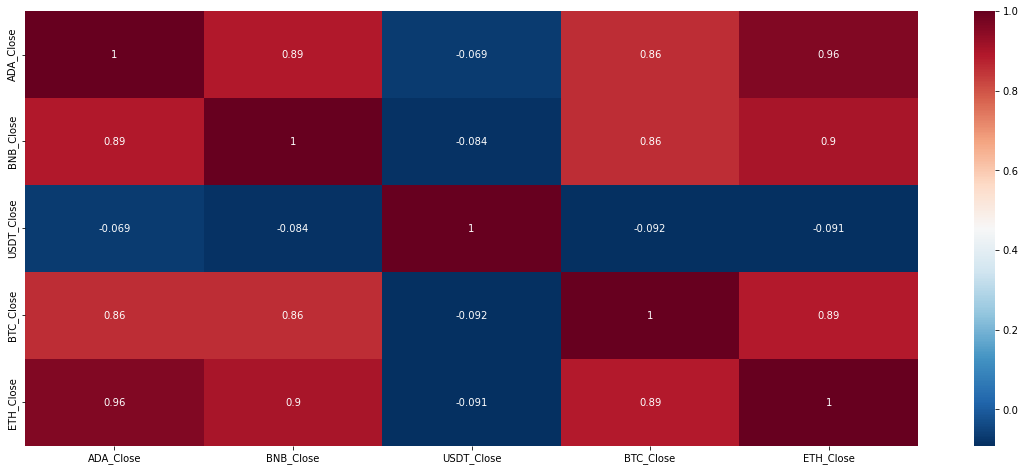

In [24]:

plt.figure(figsize=(20,8))
sns.heatmap(Corr, cmap='RdBu_r', annot=True)
plt.show()

In [25]:

Daily_returns_Corr = Crypto_daily_returns[['ADA_Close','BNB_Close','USDT_Close','BTC_Close','ETH_Close']].corr()
Daily_returns_Corr

,ADA_Close,BNB_Close,USDT_Close,BTC_Close,ETH_Close
ADA_Close,1.000000,0.422165,-0.043924,0.502847,0.569384
BNB_Close,0.422165,1.000000,-0.028280,0.589914,0.578471
USDT_Close,-0.043924,-0.028280,1.000000,0.023686,-0.008236
BTC_Close,0.502847,0.589914,0.023686,1.000000,0.733947
ETH_Close,0.569384,0.578471,-0.008236,0.733947,1.000000


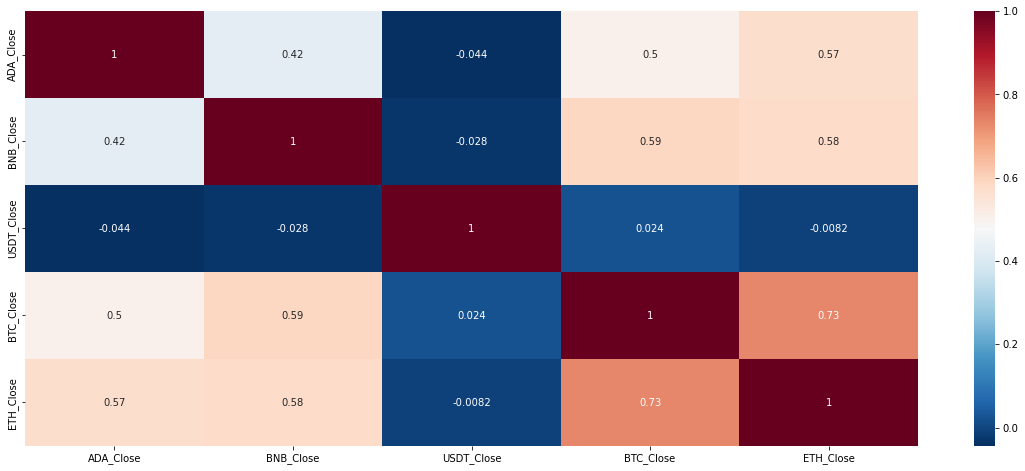

In [26]:


plt.figure(figsize=(20,8))
sns.heatmap(Daily_returns_Corr, cmap='RdBu_r', annot=True)
plt.show()

### Cacluation of risk with help of Regression

In [27]:
Predicting_Currencies = Crypto[['ADA_Close','BNB_Close','USDT_Close','BTC_Close','ETH_Close']]
Predicting_Currencies.head()

,ADA_Close,BNB_Close,USDT_Close,BTC_Close,ETH_Close
Date,,,,,
2017-10-02,0.025932,1.96467,1.00170,4409.319824,297.475006
2017-10-03,0.020816,1.82070,1.00012,4317.479980,292.463013
2017-10-04,0.021931,1.60148,1.00125,4229.359863,292.657990
2017-10-05,0.021489,1.67849,1.00030,4328.410156,295.863007
2017-10-06,0.018539,1.57991,1.00109,4370.810059,308.588013


In [28]:
## Checking the Stationarity using KPSS
from statsmodels.tsa.stattools import kpss

for col in Predicting_Currencies.columns:
    kpss_test = kpss(Predicting_Currencies[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

ADA_Close
KPSS Statistic: 1.692978
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

BNB_Close
KPSS Statistic: 2.075593
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

USDT_Close
KPSS Statistic: 0.198582
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Non-Stationary

--------------------------------------

BTC_Close
KPSS Statistic: 2.862983
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

ETH_Close
KPSS Statistic: 1.884302
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



In [29]:
## Checking the Stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
for col in Predicting_Currencies.columns:
    adf_test = adfuller(Predicting_Currencies[col])
    
    print(col)
    print('adf Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[3])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

ADA_Close
adf Statistic: -0.366860
Critical Values @ 0.05: 1349.00
p-value: 0.915487

Series is Stationary

--------------------------------------

BNB_Close
adf Statistic: -1.186281
Critical Values @ 0.05: 1349.00
p-value: 0.679469

Series is Stationary

--------------------------------------

USDT_Close
adf Statistic: -4.947970
Critical Values @ 0.05: 1359.00
p-value: 0.000028

Series is Non-Stationary

--------------------------------------

BTC_Close
adf Statistic: -0.753256
Critical Values @ 0.05: 1349.00
p-value: 0.832469

Series is Stationary

--------------------------------------

ETH_Close
adf Statistic: -0.270089
Critical Values @ 0.05: 1349.00
p-value: 0.929635

Series is Stationary

--------------------------------------



In [30]:

# Linear Regression model with ADA_daily returns and BNB daily returns
X = sm.add_constant(Crypto_daily_returns['BTC_Close'])
model = sm.OLS(Crypto_daily_returns['BNB_Close'],X)
results = model.fit()
print(results.summary())

# Linear Regression model with ADA_daily returns and USDT daily returns
X = sm.add_constant(Crypto_daily_returns['BTC_Close'])
model = sm.OLS(Crypto_daily_returns['USDT_Close'],X)
results = model.fit()
print(results.summary())

# Linear Regression model with ADA_daily returns and BTC daily returns
X = sm.add_constant(Crypto_daily_returns['BTC_Close'])
model = sm.OLS(Crypto_daily_returns['BTC_Close'],X)
results = model.fit()
print(results.summary())

# Linear Regression model with ADA_daily returns and BTC daily returns
X = sm.add_constant(Crypto_daily_returns['BTC_Close'])
model = sm.OLS(Crypto_daily_returns['ETH_Close'],X)
results = model.fit()
print(results.summary())

# Linear Regression model with BTC_daily returns and ADA daily returns
X = sm.add_constant(Crypto_daily_returns['BTC_Close'])
model = sm.OLS(Crypto_daily_returns['ADA_Close'],X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              BNB_Close   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     731.8
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.70e-129
Time:                        11:28:58   Log-Likelihood:                 2044.9
No. Observations:                1373   AIC:                            -4086.
Df Residuals:                    1371   BIC:                            -4075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.001      2.453      0.0

In [31]:
## Beta values(risk associated) with different currencies
Cardano_Beta = 0.99
Binance_coin= 0.94
Tether = 0.003
Ethereum  = 0.91
Bitcoin = 1
Currencies_Beta =  pd.DataFrame()
Currencies_Beta['Currencies'] = ['Cardano','Binance Coin','Tether','Bitcoin','Ethereum']
Currencies_Beta['Values'] = [0.99,0.94,0.003,1,0.91]
Currencies_Beta

,Currencies,Values
0,Cardano,0.990
1,Binance Coin,0.940
2,Tether,0.003
3,Bitcoin,1.000
4,Ethereum,0.910



# Forecasting Techniques For Bitcoin

In [32]:
Bitcoin = BTC.copy()
Bitcoin = Bitcoin.set_index('Date')
Bitcoin = Bitcoin[['BTC_Close']]
Bitcoin

,BTC_Close
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
...,...
2021-07-02,33897.048590
2021-07-03,34668.548402
2021-07-04,35287.779766


In [33]:
Ethereum = ETH.copy()
Ethereum = Ethereum.set_index('Date')
Ethereum = Ethereum[['ETH_Close']]
Ethereum

,ETH_Close
Date,
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.067860
2015-08-12,1.217440
...,...
2021-07-02,2150.040364
2021-07-03,2226.114282
2021-07-04,2321.724112


In [34]:
Binance = BNB.copy()
Binance = Binance.set_index('Date')
Binance = Binance[['BNB_Close']]
Binance

,BNB_Close
Date,
2017-07-26,0.105138
2017-07-27,0.107737
2017-07-28,0.104067
2017-07-29,0.107811
2017-07-30,0.106414
...,...
2021-07-02,287.423094
2021-07-03,298.237117
2021-07-04,307.732096


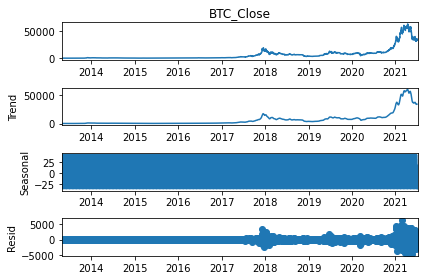

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(Bitcoin['BTC_Close'],period=12)
result.plot();

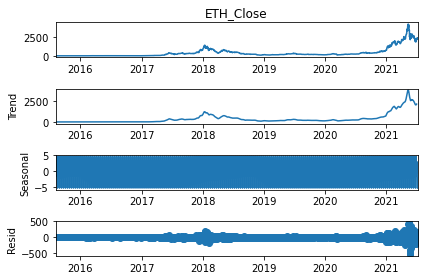

In [36]:
result = seasonal_decompose(Ethereum['ETH_Close'],period=12)
result.plot();

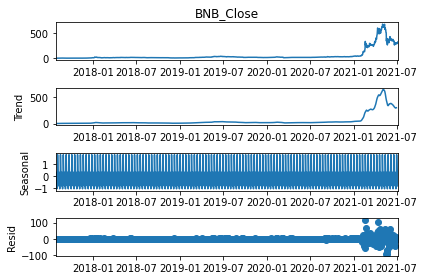

In [37]:
result = seasonal_decompose(Binance['BNB_Close'],period=12)
result.plot();

- from the above picutures, we can see that there is no seasonality in the data

###  Time Series Analysis

### Forecasting Techniques For Bitcoin

### Holt \'s Expenential Smoothing forecast Method

In [38]:
from pylab import rcParams
import statsmodels.api as sm

train_len=int(Bitcoin.shape[0]*0.7)
test_len=int(Bitcoin.shape[0])-int(Bitcoin.shape[0]*0.7)

#Train data
print(Bitcoin.shape)
train = Bitcoin.iloc[:-100]
test = Bitcoin.iloc[-100:]
print(train.shape,test.shape)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['BTC_Close']) ,seasonal_periods=12 ,trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

(2991, 1)
(2891, 1) (100, 1)
{'smoothing_level': 0.995, 'smoothing_trend': 0.02369047619047619, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 131.8554626464843, 'initial_trend': -2.7143386840820245, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


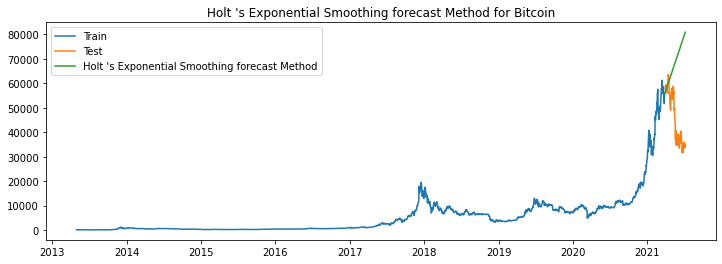

In [39]:
plt.figure(figsize=(12,4))
plt.plot( train['BTC_Close'], label='Train')
plt.plot(test['BTC_Close'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt \'s Exponential Smoothing forecast Method')
plt.legend(loc='best')
plt.title('Holt \'s Exponential Smoothing forecast Method for Bitcoin')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['BTC_Close'], y_hat_hwa['BTC_Close'])).round(2)
mape = np.round(np.mean(np.abs(test['BTC_Close']-y_hat_hwa['hw_forecast'])/test['BTC_Close'])*100,2)

Bitcoin_results= pd.DataFrame({'Method':['Holt \'s Expenential Smoothing forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })

Bitcoin_results

,Method,RMSE,MAPE
0,Holt 's Expenential Smoothing forecast Method,0.0,60.86


In [41]:
test.BTC_Close.mean()

46122.91536057389

### Time series Forecasting Techniques For Ethereum

In [42]:
from pylab import rcParams
import statsmodels.api as sm

train_len=int(Ethereum.shape[0]*0.7)
test_len=int(Ethereum.shape[0])-int(Ethereum.shape[0]*0.7)

#Train data
print(Ethereum.shape)
train = Ethereum.iloc[:-100]
test = Ethereum.iloc[-100:]
print(train.shape,test.shape)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['ETH_Close']) ,seasonal_periods=12 ,trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

(2160, 1)
(2060, 1) (100, 1)
{'smoothing_level': 0.9947805101594848, 'smoothing_trend': 9.994879487862252e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.6597603744767491, 'initial_trend': 0.8128403445297618, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


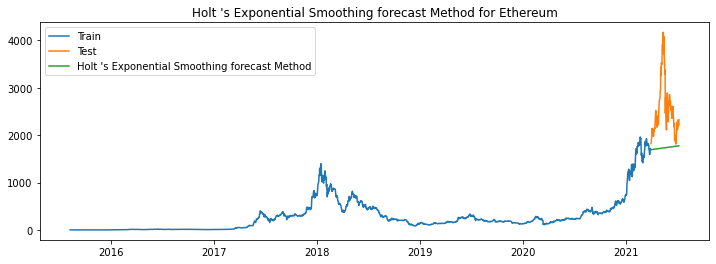

In [43]:
plt.figure(figsize=(12,4))
plt.plot( train['ETH_Close'], label='Train')
plt.plot(test['ETH_Close'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt \'s Exponential Smoothing forecast Method')
plt.legend(loc='best')
plt.title('Holt \'s Exponential Smoothing forecast Method for Ethereum')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['ETH_Close'], y_hat_hwa['ETH_Close'])).round(2)
mape = np.round(np.mean(np.abs(test['ETH_Close']-y_hat_hwa['hw_forecast'])/test['ETH_Close'])*100,2)

Ethereum_results= pd.DataFrame({'Method':['Holt \'s Expenential Smoothing forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })

Ethereum_results

,Method,RMSE,MAPE
0,Holt 's Expenential Smoothing forecast Method,0.0,29.26


In [45]:
test.ETH_Close.mean()

2552.8543526287003

### Time series Forecasting Techniques For Binance

In [46]:
from pylab import rcParams
import statsmodels.api as sm

train_len=int(Binance.shape[0]*0.7)
test_len=int(Binance.shape[0])-int(Binance.shape[0]*0.7)

#Train data
print(Binance.shape)
train = Binance.iloc[:-100]
test = Binance.iloc[-100:]
print(train.shape,test.shape)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['BNB_Close']) ,seasonal_periods=12 ,trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

(1442, 1)
(1342, 1) (100, 1)
{'smoothing_level': 0.7924097349535124, 'smoothing_trend': 0.009901690626638293, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.059359584123218644, 'initial_trend': 0.036650618280761736, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


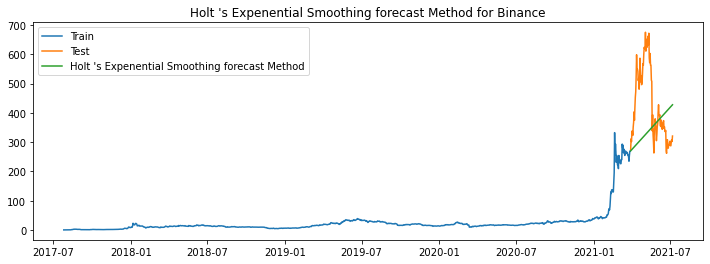

In [47]:
plt.figure(figsize=(12,4))
plt.plot( train['BNB_Close'], label='Train')
plt.plot(test['BNB_Close'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt \'s Expenential Smoothing forecast Method')
plt.legend(loc='best')
plt.title('Holt \'s Expenential Smoothing forecast Method for Binance')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['BNB_Close'], y_hat_hwa['BNB_Close'])).round(2)
mape = np.round(np.mean(np.abs(test['BNB_Close']-y_hat_hwa['hw_forecast'])/test['BNB_Close'])*100,2)

Binance_results= pd.DataFrame({'Method':['Holt \'s Expenential Smoothing forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })

Binance_results

,Method,RMSE,MAPE
0,Holt 's Expenential Smoothing forecast Method,0.0,29.46


In [49]:
test.BNB_Close.mean()

429.01647061200003

### ARIMA  

In [50]:
## Checking the Stationarity using ADF test for Bitcoin
from statsmodels.tsa.stattools import adfuller
for col in Bitcoin.columns:
    adf_test = adfuller(Bitcoin[col])
    
    print(col)
    print('adf Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[3])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

BTC_Close
adf Statistic: -0.797310
Critical Values @ 0.05: 2961.00
p-value: 0.819911

Series is Stationary

--------------------------------------



In [51]:
 ## Checking the Stationarity using KPSS for Bitcoin
from statsmodels.tsa.stattools import kpss

for col in Bitcoin.columns:
    kpss_test = kpss(Bitcoin[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

BTC_Close
KPSS Statistic: 4.205753
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



- As the both test show that the series is stationary, we can continue our analysis with the **ARIMA**

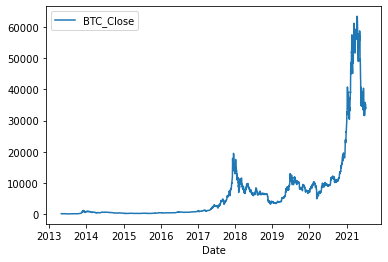

In [52]:
Bitcoin.plot()
plt.show()

In [53]:

from pmdarima import auto_arima

In [54]:
stepwise = auto_arima(Bitcoin['BTC_Close'], trace = True, suppress_warnings=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=46597.301, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46623.430, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46610.172, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46612.085, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46622.553, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=46595.377, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=46597.611, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46604.547, Time=0.65 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=46597.429, Time=1.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=46597.147, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=46595.665, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=46597.957, Time=1.79 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=46593.600, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=46596.734, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2991
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -23292.786
Date:                Sat, 06 Aug 2022   AIC                          46593.571
Time:                        11:29:13   BIC                          46617.583
Sample:                             0   HQIC                         46602.210
                               - 2991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4788      0.052      9.194      0.000       0.377       0.581
ar.L2          0.1068      0.006     19.125      0.000       0.096       0.118
ma.L1         -0.5485      0.052    -10.507      0.000      -0.651      -0.446
sigma2      3.427e+05   2024.081    169.321      0.000    3.39e+05    3.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            195226.52
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):            1426.59   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:

print(Bitcoin.shape)
train = Bitcoin.iloc[:-100]
test = Bitcoin.iloc[-100:]
print(train.shape,test.shape)

(2991, 1)
(2891, 1) (100, 1)


In [56]:


import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['BTC_Close'], order=(2,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              BTC_Close   No. Observations:                 2891
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -21773.859
Date:                Sat, 06 Aug 2022   AIC                          43555.718
Time:                        11:29:14   BIC                          43579.594
Sample:                    04-29-2013   HQIC                         43564.322
                         - 03-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8055      0.039     20.770      0.000       0.730       0.882
ar.L2          0.0174      0.006      2.889      0.004       0.006       0.029
ma.L1         -0.7918      0.038    -20.986      0.000      -0.866      -0.718
sigma2      2.051e+05   1018.070    201.480      0.000    2.03e+05    2.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            367346.27
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             788.86   Skew:                             1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start = start, end = end, typ = "levels")
print(pred)

2021-03-29    55980.147513
2021-03-30    56003.435687
2021-03-31    56022.707427
2021-04-01    56038.637277
2021-04-02    56051.805133
                  ...     
2021-07-02    56114.582846
2021-07-03    56114.582846
2021-07-04    56114.582847
2021-07-05    56114.582847
2021-07-06    56114.582847
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


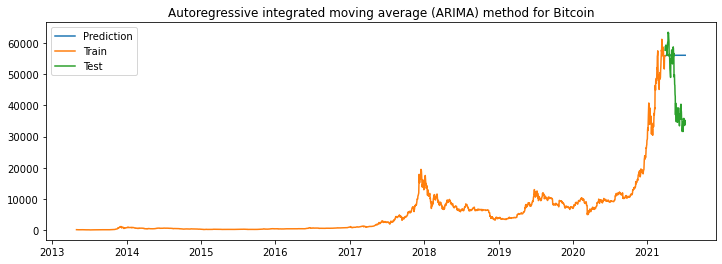

In [58]:
plt.figure(figsize=(12,4))
plt.plot(pred, label='Prediction')
plt.plot(train.BTC_Close,label = 'Train')
plt.plot(test['BTC_Close'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method for Bitcoin')
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['BTC_Close']))
print(rmse)

14534.987747171377


In [60]:
mape = np.round(np.mean(np.abs(test['BTC_Close']-pred)/test['BTC_Close'])*100,2)
print(mape)


31.07


In [61]:
test['BTC_Close'].mean()

46122.91536057389

### ARIMA for the Ethereum

In [62]:
## Checking the Stationarity using ADF test for Ethereum
from statsmodels.tsa.stattools import adfuller
for col in Ethereum.columns:
    adf_test = adfuller(Ethereum[col])
    
    print(col)
    print('adf Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[3])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

ETH_Close
adf Statistic: -0.026066
Critical Values @ 0.05: 2133.00
p-value: 0.956323

Series is Stationary

--------------------------------------



In [63]:
 ## Checking the Stationarity using KPSS for Ethereum
from statsmodels.tsa.stattools import kpss

for col in Ethereum.columns:
    kpss_test = kpss(Ethereum[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

ETH_Close
KPSS Statistic: 2.391655
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



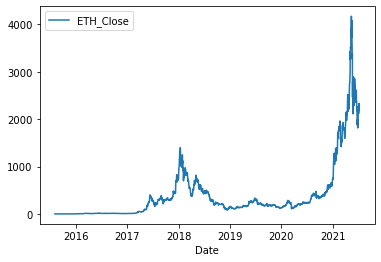

In [64]:

Ethereum.plot()
plt.show()

In [65]:
stepwise = auto_arima(Ethereum['ETH_Close'], trace = True, suppress_warnings=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22812.874, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22900.596, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22853.469, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22863.467, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22899.655, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22815.427, Time=1.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22826.625, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22809.856, Time=1.93 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22826.671, Time=1.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22699.494, Time=3.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22795.222, Time=2.17 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=22656.613, Time=3.81 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=22778.780, Time=1.41 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=22645.747, Time=3.96 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2160
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -11313.278
Date:                Sat, 06 Aug 2022   AIC                          22644.555
Time:                        11:30:05   BIC                          22695.652
Sample:                             0   HQIC                         22663.244
                               - 2160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8578      0.035    -24.843      0.000      -0.925      -0.790
ar.L2         -0.8641      0.030    -29.130      0.000      -0.922      -0.806
ar.L3         -0.3218      0.026    -12.286      0.000      -0.373      -0.270
ar.L4          0.0726      0.010      7.219      0.000       0.053       0.092
ar.L5         -0.1220      0.011    -10.861      0.000      -0.144      -0.100
ma.L1          0.7520      0.038     19.913      0.000       0.678       0.826
ma.L2          0.9565      0.025     37.753      0.000       0.907       1.006
ma.L3          0.3500      0.033     10.616      0.000       0.285       0.415
sigma2      2083.2038     13.839    150.534      0.000    2056.080    2110.327
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            390024.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             105.33   Skew:                            -1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:

print(Ethereum.shape)
train = Ethereum.iloc[:-100]
test = Ethereum.iloc[-100:]
print(train.shape,test.shape)

(2160, 1)
(2060, 1) (100, 1)


In [67]:

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['ETH_Close'], order=(5,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ETH_Close   No. Observations:                 2060
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9538.647
Date:                Sat, 06 Aug 2022   AIC                          19095.294
Time:                        11:30:07   BIC                          19145.964
Sample:                    08-08-2015   HQIC                         19113.872
                         - 03-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5628      0.075      7.512      0.000       0.416       0.710
ar.L2         -0.8929      0.028    -31.913      0.000      -0.948      -0.838
ar.L3          0.2148      0.066      3.244      0.001       0.085       0.345
ar.L4         -0.0558      0.012     -4.741      0.000      -0.079      -0.033
ar.L5          0.1211      0.009     13.009      0.000       0.103       0.139
ma.L1         -0.5598      0.075     -7.464      0.000      -0.707      -0.413
ma.L2          0.9580      0.028     34.617      0.000       0.904       1.012
ma.L3         -0.2147      0.072     -3.003      0.003      -0.355      -0.075
sigma2       623.1313      6.032    103.304      0.000     611.309     634.954
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             43370.68
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              41.41   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:


start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start = start, end = end, typ = "levels")
print(pred)

2021-03-29    1683.652961
2021-03-30    1664.804299
2021-03-31    1675.059150
2021-04-01    1699.062878
2021-04-02    1696.752253
                 ...     
2021-07-02    1683.538703
2021-07-03    1683.516349
2021-07-04    1683.513205
2021-07-05    1683.530981
2021-07-06    1683.542047
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


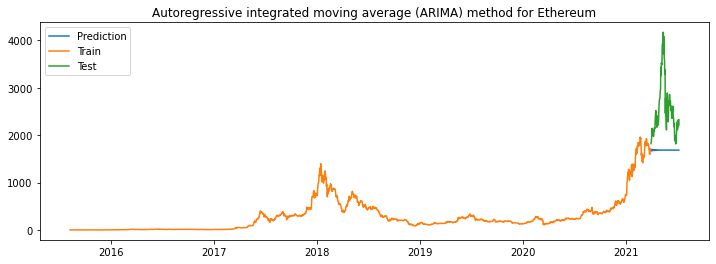

In [69]:


plt.figure(figsize=(12,4))
plt.plot(pred, label='Prediction')
plt.plot(train.ETH_Close,label = 'Train')
plt.plot(test['ETH_Close'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method for Ethereum')
plt.show()

In [70]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['ETH_Close']))
print(rmse)

1035.0947688147025


In [71]:
mape = np.round(np.mean(np.abs(test['ETH_Close']-pred)/test['ETH_Close'])*100,2)
print(mape)

31.29


In [72]:

test['ETH_Close'].mean()

2552.8543526287003

### ARIMA for the Binance

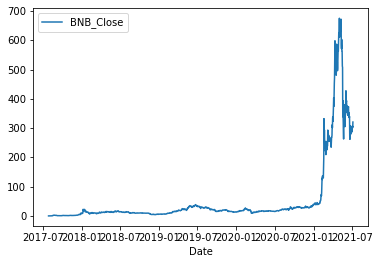

In [73]:
Binance.plot()
plt.show()

In [74]:
stepwise = auto_arima(Binance['BNB_Close'], trace = True, suppress_warnings=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10845.410, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10979.109, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10920.601, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10934.861, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10977.710, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10878.034, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10892.777, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10847.338, Time=1.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10847.356, Time=1.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10910.899, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10876.401, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10888.116, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10839.097, Time=1.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10829.033, Time=2.03 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1442
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -5405.388
Date:                Sat, 06 Aug 2022   AIC                          10826.776
Time:                        11:30:48   BIC                          10868.961
Sample:                             0   HQIC                         10842.523
                               - 1442                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2382      0.029    -42.573      0.000      -1.295      -1.181
ar.L2         -1.0379      0.029    -35.279      0.000      -1.096      -0.980
ar.L3         -0.5100      0.024    -21.617      0.000      -0.556      -0.464
ma.L1          1.0616      0.031     34.386      0.000       1.001       1.122
ma.L2          1.0308      0.026     39.163      0.000       0.979       1.082
ma.L3          0.6349      0.023     27.148      0.000       0.589       0.681
ma.L4          0.1437      0.011     13.520      0.000       0.123       0.164
sigma2       106.0669      0.778    136.408      0.000     104.543     107.591
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            287717.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             443.26   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:


print(Binance.shape)
train = Binance.iloc[:-100]
test = Binance.iloc[-100:]
print(train.shape,test.shape)

(1442, 1)
(1342, 1) (100, 1)


In [76]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['BNB_Close'], order=(3,1,4))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              BNB_Close   No. Observations:                 1342
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -4100.083
Date:                Sat, 06 Aug 2022   AIC                           8216.166
Time:                        11:30:49   BIC                           8257.776
Sample:                    07-26-2017   HQIC                          8231.754
                         - 03-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3490      0.125     -2.800      0.005      -0.593      -0.105
ar.L2          0.0768      0.068      1.137      0.256      -0.056       0.209
ar.L3          0.1141      0.046      2.472      0.013       0.024       0.205
ma.L1          0.1304      0.124      1.050      0.294      -0.113       0.374
ma.L2          0.1573      0.054      2.888      0.004       0.051       0.264
ma.L3         -0.1252      0.065     -1.923      0.054      -0.253       0.002
ma.L4         -0.1876      0.023     -8.140      0.000      -0.233      -0.142
sigma2        26.4885      0.187    141.513      0.000      26.122      26.855
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           6837902.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             102.50   Skew:                            13.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       351.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start = start, end = end, typ = "levels")
print(pred)

2021-03-29    276.992225
2021-03-30    269.833611
2021-03-31    268.971560
2021-04-01    270.073129
2021-04-02    268.805343
                 ...    
2021-07-02    269.075015
2021-07-03    269.075015
2021-07-04    269.075015
2021-07-05    269.075015
2021-07-06    269.075015
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


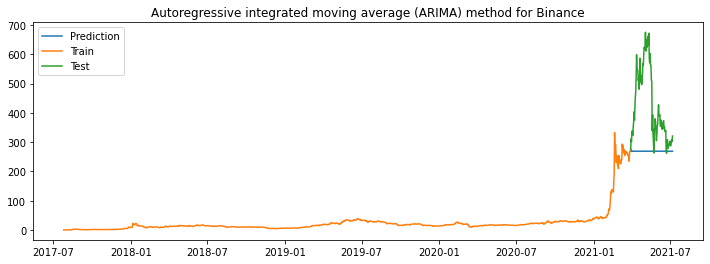

In [78]:
plt.figure(figsize=(12,4))
plt.plot(pred, label='Prediction')
plt.plot(train.BNB_Close,label ='Train')
plt.plot(test['BNB_Close'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method for Binance')
plt.show()

In [79]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['BNB_Close']))
print(rmse)

201.99555179050952


In [80]:
mape = np.round(np.mean(np.abs(test['BNB_Close']-pred)/test['BNB_Close'])*100,2)
print(mape)

32.23


In [81]:
test['BNB_Close'].mean()

429.01647061200003

### LSTM Methods for Bitcoin

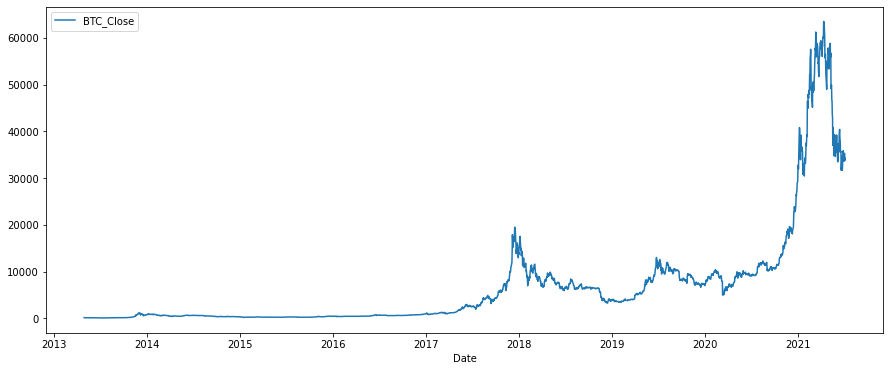

In [82]:
Bitcoin.plot(figsize = (15,6))
plt.show()

In [83]:

print(Bitcoin.shape)
train = Bitcoin.iloc[:-100]
test = Bitcoin.iloc[-100:]
print(train.shape,test.shape)

(2991, 1)
(2891, 1) (100, 1)


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [85]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [86]:
scaled_train[:10]

array([[0.00124413],
       [0.00115357],
       [0.00079378],
       [0.00060121],
       [0.00047927],
       [0.00072038],
       [0.00077612],
       [0.00071711],
       [0.00070403],
       [0.00073781]])

In [87]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [88]:

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [89]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y:\n{y}')

Given the Array: 
[0.00124413 0.00115357 0.00079378]
Predict this y:
[[0.00060121]]


In [90]:

X.shape

(1, 3, 1)

In [91]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
## Define the Model

model = Sequential()
model.add(LSTM(100,activation = 'relu', input_shape = (n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss= 'mse')

In [94]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [95]:

model.fit(generator,epochs= 50)

Epoch 1/50
2879/2879 [==============================] - 11s 3ms/step - loss: 0.0012
Epoch 2/50
2879/2879 [==============================] - 10s 3ms/step - loss: 3.4632e-04
Epoch 3/50
2879/2879 [==============================] - 9s 3ms/step - loss: 2.2939e-04
Epoch 4/50
2879/2879 [==============================] - 9s 3ms/step - loss: 2.1977e-04
Epoch 5/50
2879/2879 [==============================] - 11s 4ms/step - loss: 2.0670e-04
Epoch 6/50
2879/2879 [==============================] - 10s 3ms/step - loss: 1.5243e-04
Epoch 7/50
2879/2879 [==============================] - 11s 4ms/step - loss: 1.3455e-04
Epoch 8/50
2879/2879 [==============================] - 10s 3ms/step - loss: 1.2807e-04
Epoch 9/50
2879/2879 [==============================] - 11s 4ms/step - loss: 1.2833e-04
Epoch 10/50
2879/2879 [==============================] - 10s 3ms/step - loss: 1.1325e-04
Epoch 11/50
2879/2879 [==============================] - 11s 4ms/step - loss: 1.1936e-04
Epoch 12/50
2879/2879 [=============

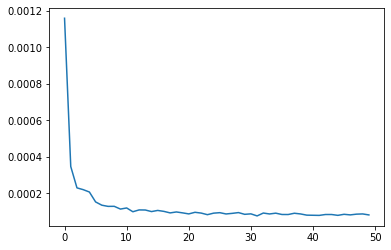

In [96]:

loss_per_epoch  =model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [97]:
last_train_batch = scaled_train[-12:]

In [98]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [99]:
model.predict(last_train_batch)

array([[0.9133468]], dtype=float32)

In [100]:
scaled_test[0]

array([0.94290307])

In [101]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    #append the prediction into array
    test_prediction.append(current_pred)
    
    # use the prediction to update the batch and to remove the first values
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [102]:
test_prediction

[array([0.9133468], dtype=float32),
 array([0.91222674], dtype=float32),
 array([0.9103207], dtype=float32),
 array([0.90796417], dtype=float32),
 array([0.90540916], dtype=float32),
 array([0.90279096], dtype=float32),
 array([0.90018123], dtype=float32),
 array([0.89760643], dtype=float32),
 array([0.89508134], dtype=float32),
 array([0.8926099], dtype=float32),
 array([0.89018506], dtype=float32),
 array([0.8878036], dtype=float32),
 array([0.88546383], dtype=float32),
 array([0.88316387], dtype=float32),
 array([0.88090235], dtype=float32),
 array([0.8786781], dtype=float32),
 array([0.87648994], dtype=float32),
 array([0.87433714], dtype=float32),
 array([0.8722187], dtype=float32),
 array([0.87013406], dtype=float32),
 array([0.8680823], dtype=float32),
 array([0.8660628], dtype=float32),
 array([0.8640749], dtype=float32),
 array([0.8621178], dtype=float32),
 array([0.8601909], dtype=float32),
 array([0.8582936], dtype=float32),
 array([0.85642517], dtype=float32),
 array([0.854

In [103]:

test.head()

,BTC_Close
Date,
2021-03-29,57750.199871
2021-03-30,58917.693045
2021-03-31,58918.832714
2021-04-01,59095.807978
2021-04-02,59384.313359


In [104]:

true_predictions = scaler.inverse_transform(test_prediction)
test['Prediction'] = true_predictions

In [105]:

test.head()

,BTC_Close,Prediction
Date,,
2021-03-29,57750.199871,55942.106911
2021-03-30,58917.693045,55873.585764
2021-03-31,58918.832714,55756.984590
2021-04-01,59095.807978,55612.824730
2021-04-02,59384.313359,55456.522712


In [106]:

test.tail()

,BTC_Close,Prediction
Date,,
2021-07-02,33897.048590,47417.182081
2021-07-03,34668.548402,47371.526840
2021-07-04,35287.779766,47326.389373
2021-07-05,33746.002456,47281.769679
2021-07-06,34235.193451,47237.660466


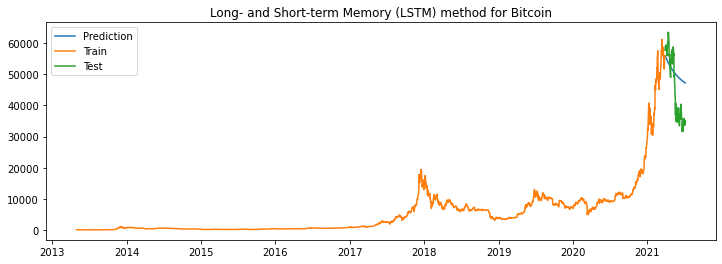

In [107]:
plt.figure(figsize=(12,4))
plt.plot(test['Prediction'], label='Prediction')
plt.plot(train.BTC_Close,label ='Train')
plt.plot(test['BTC_Close'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Long- and Short-term Memory (LSTM) method for Bitcoin')
plt.show()

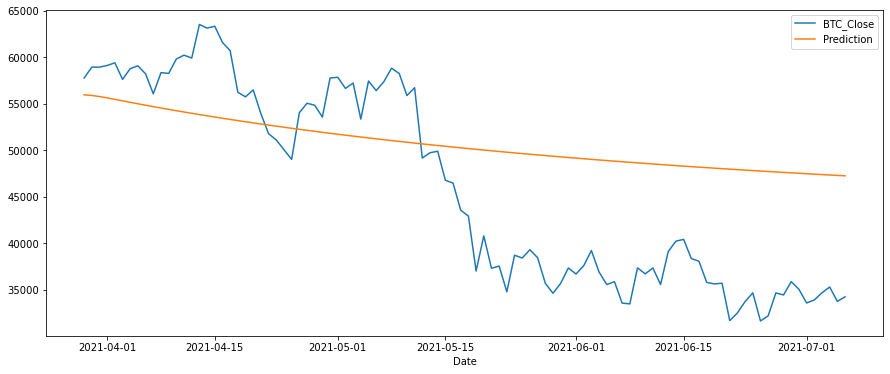

In [108]:

test.plot(figsize = (15,6))
plt.show()

In [109]:
rsme = sqrt(mean_squared_error(test['BTC_Close'], test['Prediction']))
print(rsme)

9514.851768404951


In [110]:
mape = np.round(np.mean(np.abs(test['BTC_Close']-test.Prediction)/test['BTC_Close'])*100,2)
print(mape)

21.08


In [111]:
test.BTC_Close.mean()

46122.91536057389

### LSTM Methods for Ethereum

In [112]:
Ethereum.head()

,ETH_Close
Date,
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.067860
2015-08-12,1.217440


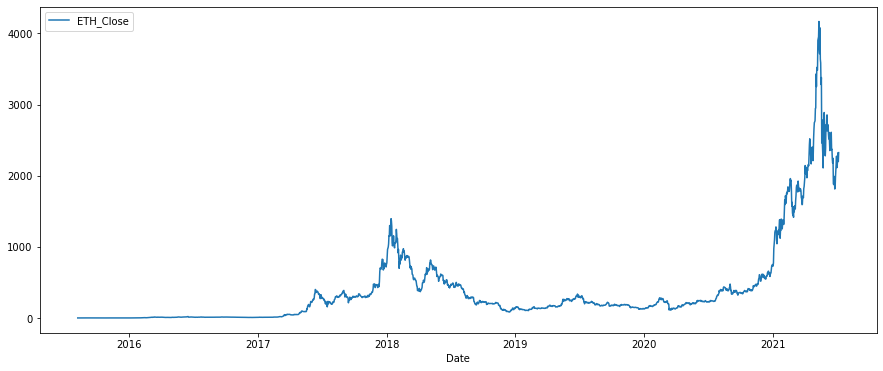

In [113]:
Ethereum.plot(figsize =(15,6))
plt.show()

In [114]:

print(Ethereum.shape)
train = Ethereum.iloc[:-100]
test = Ethereum.iloc[-100:]
print(train.shape,test.shape)

(2160, 1)
(2060, 1) (100, 1)


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [116]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [117]:
scaled_train[:10]

array([[0.00016252],
       [0.00013628],
       [0.00013962],
       [0.00032302],
       [0.00039935],
       [0.00071073],
       [0.00071083],
       [0.00063992],
       [0.00057722],
       [0.00039229]])

In [118]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [119]:

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y:\n{y}')


Given the Array: 
[0.00016252 0.00013628 0.00013962]
Predict this y:
[[0.00032302]]


In [120]:
X.shape

(1, 3, 1)

In [121]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [122]:
## Define the Model

model = Sequential()
model.add(LSTM(100,activation = 'relu', input_shape = (n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss= 'mse')

In [123]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [124]:

model.fit(generator,epochs= 50)

Epoch 1/50
2048/2048 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 2/50
2048/2048 [==============================] - 7s 3ms/step - loss: 6.5380e-04
Epoch 3/50
2048/2048 [==============================] - 7s 3ms/step - loss: 4.6352e-04
Epoch 4/50
2048/2048 [==============================] - 7s 3ms/step - loss: 4.5782e-04
Epoch 5/50
2048/2048 [==============================] - 7s 3ms/step - loss: 4.3468e-04
Epoch 6/50
2048/2048 [==============================] - 6s 3ms/step - loss: 3.1014e-04
Epoch 7/50
2048/2048 [==============================] - 7s 3ms/step - loss: 3.3546e-04
Epoch 8/50
2048/2048 [==============================] - 7s 4ms/step - loss: 2.9581e-04
Epoch 9/50
2048/2048 [==============================] - 12s 6ms/step - loss: 2.7890e-04
Epoch 10/50
2048/2048 [==============================] - 10s 5ms/step - loss: 2.8054e-04
Epoch 11/50
2048/2048 [==============================] - 8s 4ms/step - loss: 2.9867e-04A: 1s - los - ETA: 0s - loss: 3.0
Epoch 12/5

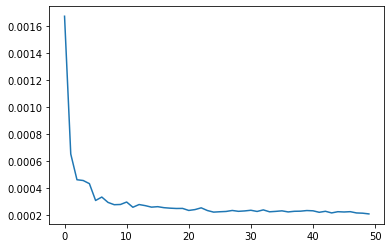

In [125]:
loss_per_epoch  =model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [126]:
last_train_batch = scaled_train[-12:]

In [127]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [128]:
model.predict(last_train_batch)

array([[0.8311673]], dtype=float32)

In [129]:

scaled_test[0]

array([0.92831676])

In [130]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    #append the prediction into array
    test_prediction.append(current_pred)
    
    # use the prediction to update the batch and to remove the first values
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [131]:
test_prediction

[array([0.8311673], dtype=float32),
 array([0.8010457], dtype=float32),
 array([0.7724492], dtype=float32),
 array([0.74514], dtype=float32),
 array([0.7191876], dtype=float32),
 array([0.69442314], dtype=float32),
 array([0.670655], dtype=float32),
 array([0.6476885], dtype=float32),
 array([0.62549466], dtype=float32),
 array([0.6043935], dtype=float32),
 array([0.5844038], dtype=float32),
 array([0.5654825], dtype=float32),
 array([0.54752797], dtype=float32),
 array([0.5304792], dtype=float32),
 array([0.5142669], dtype=float32),
 array([0.4988192], dtype=float32),
 array([0.4840722], dtype=float32),
 array([0.46996263], dtype=float32),
 array([0.45647582], dtype=float32),
 array([0.44363475], dtype=float32),
 array([0.43137455], dtype=float32),
 array([0.41964218], dtype=float32),
 array([0.4083908], dtype=float32),
 array([0.3975811], dtype=float32),
 array([0.38717872], dtype=float32),
 array([0.37715134], dtype=float32),
 array([0.36748967], dtype=float32),
 array([0.3581709], 

In [132]:
true_predictions = scaler.inverse_transform(test_prediction)
test['Prediction'] = true_predictions

In [133]:
test.head()

,ETH_Close,Prediction
Date,,
2021-03-29,1819.684963,1629.298213
2021-03-30,1846.033698,1570.268081
2021-03-31,1918.362061,1514.226625
2021-04-01,1977.276888,1460.708009
2021-04-02,2143.225632,1409.848317


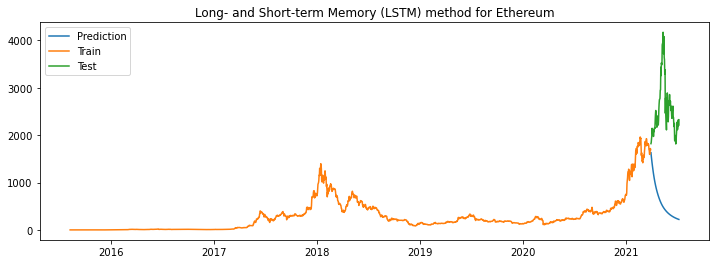

In [134]:
plt.figure(figsize=(12,4))
plt.plot(test['Prediction'], label='Prediction')
plt.plot(train.ETH_Close,label ='Train')
plt.plot(test['ETH_Close'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Long- and Short-term Memory (LSTM) method for Ethereum')
plt.show()

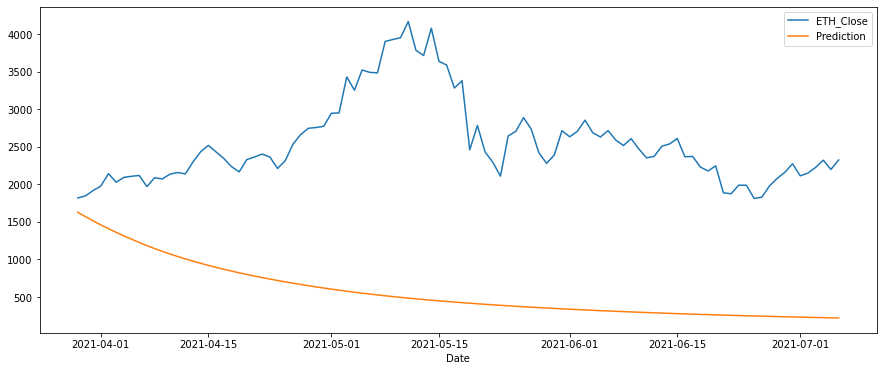

In [135]:
test.plot(figsize = (15,6))
plt.show()

In [136]:
rsme = sqrt(mean_squared_error(test['ETH_Close'], test['Prediction']))
print(rsme)

2114.0155574330674


In [137]:
mape = np.round(np.mean(np.abs(test['ETH_Close']-test.Prediction)/test['ETH_Close'])*100,2)
print(mape)

75.84


In [138]:
test.ETH_Close.mean()

2552.8543526287003

### LSTM Methods for Binance Coin

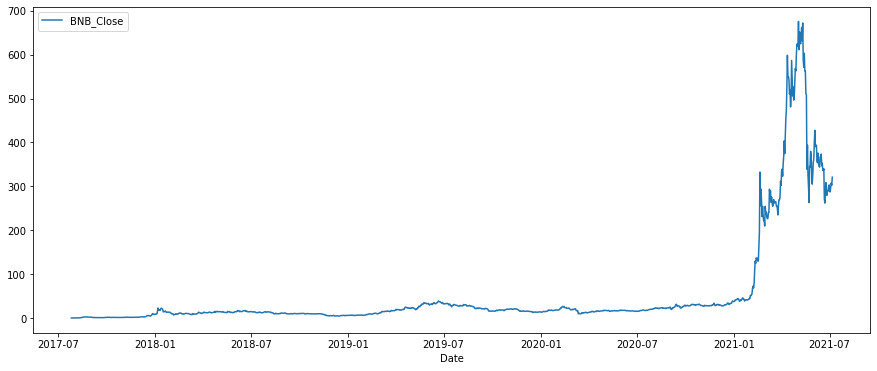

In [139]:
Binance.plot(figsize = (15,6))
plt.show()

In [140]:

print(Binance.shape)
train = Binance.iloc[:-100]
test = Binance.iloc[-100:]
print(train.shape,test.shape)

(1442, 1)
(1342, 1) (100, 1)


In [141]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

scaled_train[:10]

array([[1.58524514e-05],
       [2.36686156e-05],
       [1.26315596e-05],
       [2.38911586e-05],
       [1.96898629e-05],
       [1.31819122e-05],
       [0.00000000e+00],
       [1.75990963e-06],
       [2.03755518e-05],
       [2.29378220e-05]])

In [142]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y:\n{y}')


Given the Array: 
[1.58524514e-05 2.36686156e-05 1.26315596e-05]
Predict this y:
[[2.38911586e-05]]


In [143]:
X.shape

(1, 3, 1)

In [144]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


## Define the Model

model = Sequential()
model.add(LSTM(100,activation = 'relu', input_shape = (n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss= 'mse')


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.fit(generator,epochs= 50)

Epoch 1/50
1330/1330 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 2/50
1330/1330 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 3/50
1330/1330 [==============================] - 4s 3ms/step - loss: 7.0725e-04
Epoch 4/50
1330/1330 [==============================] - 4s 3ms/step - loss: 6.2499e-04
Epoch 5/50
1330/1330 [==============================] - 4s 3ms/step - loss: 6.2482e-04
Epoch 6/50
1330/1330 [==============================] - 4s 3ms/step - loss: 4.4403e-04A: 0s - loss: 4.444
Epoch 7/50
1330/1330 [==============================] - 4s 3ms/step - loss: 4.3712e-04
Epoch 8/50
1330/1330 [==============================] - 4s 3ms/step - loss: 4.6627e-04
Epoch 9/50
1330/1330 [==============================] - 4s 3ms/step - loss: 3.4812e-04
Epoch 10/50
1330/1330 [==============================] - 4s 3ms/step - loss: 4.1652e-04
Epoch 11/50
1330/1330 [==============================] - 4s 3ms/step - loss: 4.3685e-04
Epoch 12/50
1330/1330 [=======

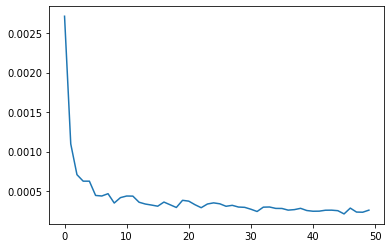

In [146]:
loss_per_epoch  =model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.show()

In [147]:
last_train_batch = scaled_train[-12:]

last_train_batch = last_train_batch.reshape((1,n_input,n_features))

model.predict(last_train_batch)

array([[0.79458565]], dtype=float32)

In [148]:
scaled_test[0]

array([0.82737256])

In [149]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    #append the prediction into array
    test_prediction.append(current_pred)
    
    # use the prediction to update the batch and to remove the first values
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

test_prediction

[array([0.79458565], dtype=float32),
 array([0.78567314], dtype=float32),
 array([0.77350116], dtype=float32),
 array([0.76460093], dtype=float32),
 array([0.76035416], dtype=float32),
 array([0.76010793], dtype=float32),
 array([0.76207215], dtype=float32),
 array([0.7647234], dtype=float32),
 array([0.76662254], dtype=float32),
 array([0.7676667], dtype=float32),
 array([0.76787496], dtype=float32),
 array([0.7675616], dtype=float32),
 array([0.76702476], dtype=float32),
 array([0.76653695], dtype=float32),
 array([0.7662622], dtype=float32),
 array([0.7661971], dtype=float32),
 array([0.766273], dtype=float32),
 array([0.7664084], dtype=float32),
 array([0.7665344], dtype=float32),
 array([0.76661456], dtype=float32),
 array([0.76664174], dtype=float32),
 array([0.76662993], dtype=float32),
 array([0.7665992], dtype=float32),
 array([0.7665679], dtype=float32),
 array([0.7665464], dtype=float32),
 array([0.7665378], dtype=float32),
 array([0.76653934], dtype=float32),
 array([0.7665

In [150]:

true_predictions = scaler.inverse_transform(test_prediction)
test['Prediction'] = true_predictions

test.head()

,BNB_Close,Prediction
Date,,
2021-03-29,275.214619,264.312439
2021-03-30,311.426494,261.348887
2021-03-31,302.063459,257.301506
2021-04-01,335.212878,254.342037
2021-04-02,339.007727,252.929917


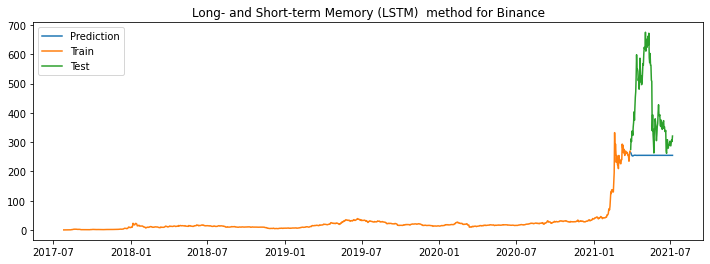

In [151]:
plt.figure(figsize=(12,4))
plt.plot(test['Prediction'], label='Prediction')
plt.plot(train.BNB_Close,label ='Train')
plt.plot(test['BNB_Close'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Long- and Short-term Memory (LSTM)  method for Binance')
plt.show()

In [152]:
rsme = sqrt(mean_squared_error(test['BNB_Close'], test['Prediction']))
print(rsme)

213.31867335922658


In [153]:
mape = np.round(np.mean(np.abs(test['BNB_Close']-test.Prediction)/test['BNB_Close'])*100,2)
print(mape)

35.66


In [154]:
test.BNB_Close.mean()

429.01647061200003

## 